# Overlap capacity with real training
Basically a notebook to do capacity calulations with the real training. 

In [1]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline

np.set_printoptions(suppress=True, precision=2)

sns.set(font_scale=2.0)

#### Git machinery

In [2]:
run_old_version = False
if run_old_version:
    hash_when_file_was_written = '95c0ca0cdca3f00e55f0e46dd9a8b8c1f492d94e'
    hash_at_the_moment = subprocess.check_output(["git", 'rev-parse', 'HEAD']).strip()
    print('Actual hash', hash_at_the_moment)
    
    print('Hash of the commit used to run the simulation', hash_when_file_was_written)
    subprocess.call(['git', 'checkout', hash_when_file_was_written])

In [3]:
from network import Protocol, BCPNNFast, NetworkManager
from analysis_functions import calculate_recall_success_sequences
from connectivity_functions import create_artificial_manager 

## Calculations

#### Tau_z

In [4]:
# Patterns parameters
hypercolumns = 4
minicolumns = 50

dt = 0.001

values_to_save = ['o']

# Recall
n = 10
T_cue = 0.100
T_recall = 10.0

# Protocol
training_time = 0.1
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
epochs = 3

# Build the network
tau_z_pre = 0.150
nn = BCPNNFast(hypercolumns, minicolumns, tau_z_pre=tau_z_pre)


# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the protocol for training
overlap = 3
number_of_sequences = 2
half_width = 4
units_to_overload = [i for i in range(overlap)]

overlap_vector = np.arange(1, 10, 1, dtype=int)
tau_z_pre_vector = np.arange(0.050, 1.050, 0.050)
total_success_tau_z = np.zeros((overlap_vector.size, tau_z_pre_vector.size))

In [5]:
for overlap_index, overlap in enumerate(overlap_vector):
    print('overlap, index', overlap_index)
    for tau_z_pre_index, tau_z_pre in enumerate(tau_z_pre_vector):

        protocol = Protocol()
        units_to_overload = [i for i in range(overlap)]
        sequences = protocol.create_overload_chain(number_of_sequences, half_width, units_to_overload)
        protocol.cross_protocol(sequences, training_time=training_time,
                                inter_sequence_interval=inter_sequence_interval, epochs=epochs)

        # Train
        manager.run_network_protocol(protocol=protocol, verbose=False)

        successes = calculate_recall_success_sequences(manager, T_recall=T_recall, T_cue=T_cue, n=n, sequences=sequences)
        total_success_tau_z[overlap_index, tau_z_pre_index] = np.mean(successes)

('overlap, index', 0)
('overlap, index', 1)
('overlap, index', 2)
('overlap, index', 3)
('overlap, index', 4)
('overlap, index', 5)
('overlap, index', 6)
('overlap, index', 7)
('overlap, index', 8)


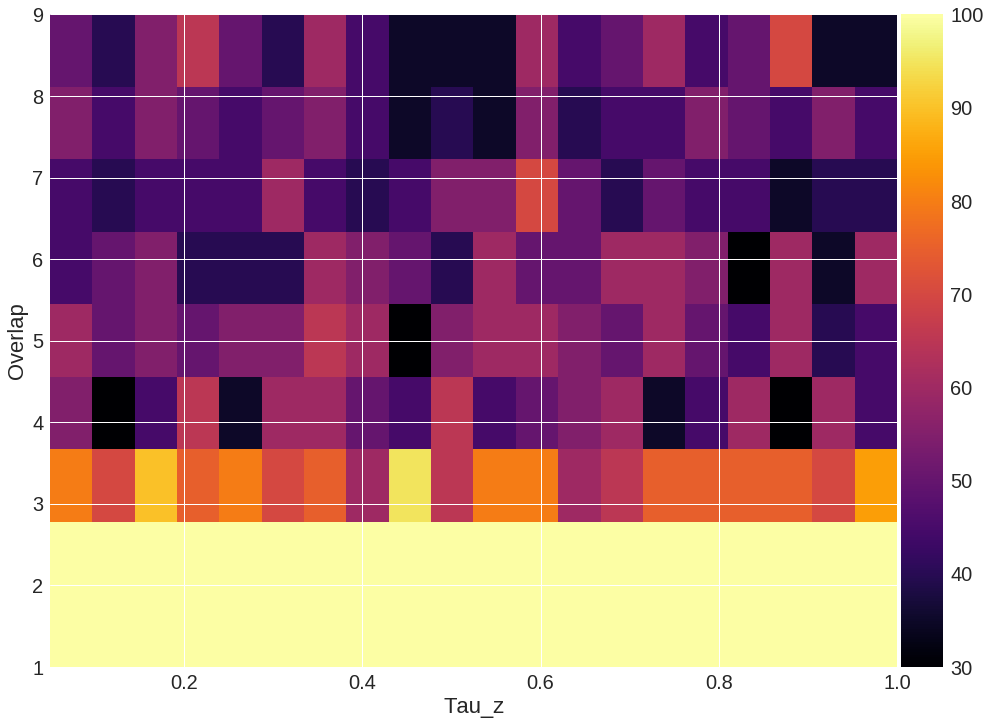

In [6]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
cmap = 'inferno'

extent = [tau_z_pre_vector[0], tau_z_pre_vector[-1], overlap_vector[0], overlap_vector[-1]]
im = ax.imshow(total_success_tau_z, origin='lower', cmap=cmap, interpolation='None', extent=extent, aspect='auto')

ax.set_xlabel('Tau_z')
ax.set_ylabel('Overlap')

divider1 = make_axes_locatable(ax)
cax1 = divider1.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax1, orientation='vertical');

#### Let's save the data

#### Cut through one axis

In [ ]:
# Patterns parameters
hypercolumns = 4
minicolumns = 50

dt = 0.001

values_to_save = ['o']

# Recall
n = 10
T_cue = 0.100
T_recall = 10.0

# Protocol
training_time = 0.1
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
epochs = 3

# Build the network
tau_z_pre = 0.150
nn = BCPNNFast(hypercolumns, minicolumns, tau_z_pre=tau_z_pre)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the protocol for training
overlap = 3
number_of_sequences = 2
half_width = 4
units_to_overload = [i for i in range(overlap)]

overlap_vector = np.arange(1, 10, 1, dtype=int)
total_success_tau_z = np.zeros(overlap_vector.size)

In [ ]:
for overlap_index, overlap in enumerate(overlap_vector):
    print('overlap, index', overlap_index)
    for tau_z_pre_index, tau_z_pre in enumerate(tau_z_pre_vector):

        protocol = Protocol()
        units_to_overload = [i for i in range(overlap)]
        sequences = protocol.create_overload_chain(number_of_sequences, half_width, units_to_overload)
        protocol.cross_protocol(sequences, training_time=training_time,
                                inter_sequence_interval=inter_sequence_interval, epochs=epochs)

        # Train
        manager.run_network_protocol(protocol=protocol, verbose=False)

        successes = calculate_recall_success_sequences(manager, T_recall=T_recall, T_cue=T_cue, n=n, sequences=sequences)
        total_success_tau_z[overlap_index, tau_z_pre_index] = np.mean(successes)

#### Git machinery

In [3]:
if run_old_version:
    subprocess.call(['git', 'checkout', 'master'])